In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('../data/input_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df = df.drop(columns=['customerID', 'StreamingMovies', 'PaperlessBilling'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [23]:
df = df.replace({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})
df.head()

/var/folders/bq/gvskjdxj6j97py__hndq88p00000gn/T/ipykernel_915/2918684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,Month-to-month,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,One year,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,Month-to-month,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,One year,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,Month-to-month,Electronic check,70.70,151.65,1


In [24]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numeric columns in dataset:", numeric_cols)

Numeric columns in dataset: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MonthlyCharges', 'Churn']


In [27]:
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Specify numeric columns
numeric_cols = ['tenure', 'MonthlyCharges']

# Fit scaler only on the numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Ensure the notebook directory exists
os.makedirs("notebook", exist_ok=True)

# Save the fitted scaler
SCALER_PATH = "notebook/scaler.pkl"
joblib.dump(scaler, SCALER_PATH)

print(f"Scaler saved successfully at {SCALER_PATH} for columns: {numeric_cols}")


Scaler saved successfully at notebook/scaler.pkl for columns: ['tenure', 'MonthlyCharges']


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Build a sequential neural network model with dropout and batch normalization
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Train the neural network model
history = model.fit(
    X_train_scaled, 
    y_train, 
    epochs=200, 
    batch_size=32, 
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

Epoch 1/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.6567 - loss: 0.6494 - val_accuracy: 0.7793 - val_loss: 0.5034
Epoch 2/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.7329 - loss: 0.5340 - val_accuracy: 0.7949 - val_loss: 0.4588
Epoch 3/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.7599 - loss: 0.5029 - val_accuracy: 0.8020 - val_loss: 0.4385
Epoch 4/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.7634 - loss: 0.4904 - val_accuracy: 0.8034 - val_loss: 0.4361
Epoch 5/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7641 - loss: 0.4897 - val_accuracy: 0.8013 - val_loss: 0.4306
Epoch 6/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7659 - loss: 0.4844 - val_accuracy: 0.8013 - val_loss: 0.4317
Epoch 7/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.7682 - loss: 0.4805 - val_accuracy: 0.8034 - val_loss: 0.4297
Epoch 8/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7687 - loss: 0

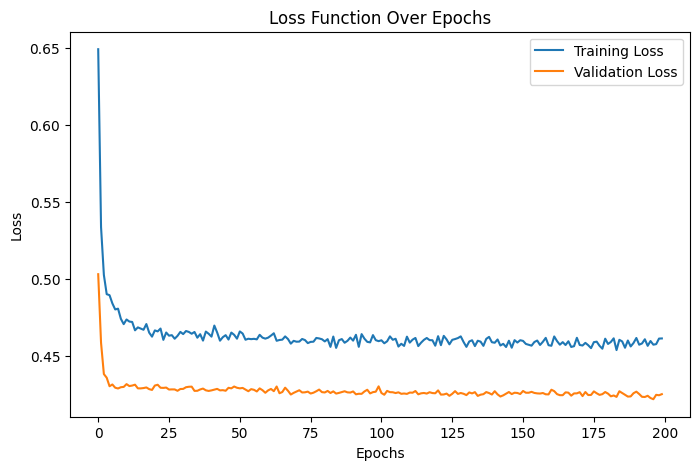

In [30]:

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.legend()
plt.show()

In [31]:
model.get_weights()

[array([[ 3.7008223e-01, -1.3396019e-01, -2.5440893e-01, -9.8382458e-02,
         -2.2554652e-01,  2.1861890e-01,  4.8147812e-02,  3.3517060e-01,
         -2.1994004e-01, -1.5617821e-01,  2.6631764e-01, -3.7177786e-01,
          1.9694227e-01, -1.9544204e-01, -2.6846597e-01,  1.8230319e-01,
          2.3275113e-02, -3.5468900e-01, -1.0615696e-01, -1.5379140e-01,
         -4.0879607e-01, -1.8051468e-01, -1.9783722e-01, -2.3398054e-01,
         -3.6049142e-01,  1.4458521e-01,  2.2642757e-01, -2.1929945e-01,
          2.8294411e-01,  2.7797201e-01,  2.5588049e-02, -2.5069830e-01],
        [ 2.5262237e-01, -3.1451264e-01,  1.8762362e-01,  3.4689975e-01,
          1.5050173e-01, -1.9403969e-01, -2.2667310e-01,  4.8383307e-03,
         -1.1096680e-02, -3.8241440e-01, -2.2473852e-01,  8.7691106e-02,
         -2.2239766e-01,  2.3146033e-01,  1.3578898e-02, -1.2800317e-01,
         -3.2399744e-01, -4.0673395e-03,  9.0653300e-01, -3.5701221e-01,
          2.0780464e-01,  5.1715159e-01,  4.969815

In [32]:
df.size

126774

In [33]:
from tensorflow.keras.models import save_model

# Save trained ANN model
model.save("churn_model.h5")
print("✅ ANN model saved as churn_model.h5")


✅ ANN model saved as churn_model.h5


In [34]:
import joblib